# Tests

## Tests for iterations number

Below tests for sinuses functions (see [Description of tests functions properties](https://github.com/ASEDOS999/Optimization-Halving-The-Square/blob/master/Tests/Description.pdf) part 1.1). This functions met conditions of lemma 2(see [Description of method](https://github.com/ASEDOS999/Optimization-Halving-The-Square/blob/master/One%20method.pdf)).

0 % is completed
4 % is completed
8 % is completed
12 % is completed
16 % is completed
20 % is completed
24 % is completed
28 % is completed
32 % is completed
36 % is completed
40 % is completed
44 % is completed
48 % is completed
52 % is completed
56 % is completed
60 % is completed
64 % is completed
68 % is completed
72 % is completed
76 % is completed
80 % is completed
84 % is completed
88 % is completed
92 % is completed
96 % is completed
100 % is completed


<IPython.core.display.Javascript object>


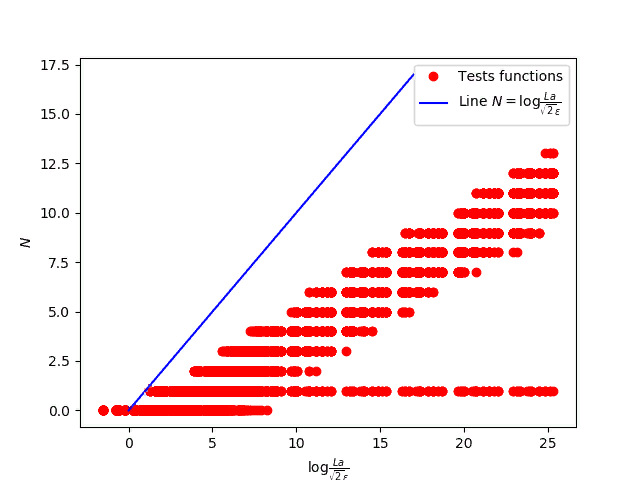

Text(0.5,0,'$\\log \\frac{La}{\\sqrt{2}\\epsilon}$')

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from method_functions import halving_square
from test_functions import sinuses
import math
%matplotlib notebook


results = []
epsilon = [0.1**(1 + i) for i in range(7)] + [0.5**(1 + i) for i in range(7)]
num = 0
for i in np.linspace(1.1, 1.9, 5).tolist():
    for j in np.linspace(1.1, 1.9, 5).tolist():
        print((num * 4), '% is completed')
        a = [[0.1, 0.1], [0.1, 0.1, 0.1]]
        m, n = 1, 2
        while m != -1:
            f = sinuses(a, [i, j])
            for eps in epsilon:
                N = halving_square(f, eps, [0, 1, 0, 1])
                results.append((N[1], eps, N[2], f.L))
            m, n = 1, 2
            while m != -1 and a[m][n] == 1:
                a[m][n] = 0.1
                n = n - 1
                if n < 0:
                    m = m - 1
                    if m > 0:
                        n = 2
                    else:
                        n = 1
            a[max(m, 0)][n] *= 10
        num += 1
print('100 % is completed')
plt.plot([math.log(i[3] / i[1] / math.sqrt(2), 2) for i in results], [i[0] for i in results], 'ro')
plt.plot([0, 17], [0, 17], 'b')
plt.legend(('Tests functions', r'Line $N = \log \frac{La}{\sqrt{2}\epsilon}$'))
plt.ylabel(r'$N$')
plt.xlabel(r'$\log \frac{La}{\sqrt{2}\epsilon}$')

Results of this experiment met theoretical results for number of iterations (see Theorem 4.1 in [Description of method](https://github.com/ASEDOS999/Optimization-Halving-The-Square/blob/master/One%20method.pdf)).

## Comparison of gradient descent and our method

In following tests on graphic there are following names of type for tasks' results:

* Type 1 (T1) - tasks which gradient descent completed but halving square was not complete,

* Type 2 (T2) - gradient descent is faster than halving square,

* Type 3 (T3) - work's times are approximately equal or time is too short to measure,

* Type 4 (T4) - gradient descent is slower than halving square,

* Type 5 (T5) - gradient descent was not complete but halving square completed,

* Type 6 (T6) - both methods were not completed successfully

### Sinuses

0 % is completed
4 % is completed
8 % is completed
12 % is completed
16 % is completed
20 % is completed
24 % is completed
28 % is completed
32 % is completed
36 % is completed
40 % is completed
44 % is completed
48 % is completed
52 % is completed
56 % is completed
60 % is completed
64 % is completed
68 % is completed
72 % is completed
76 % is completed
80 % is completed
84 % is completed
88 % is completed
92 % is completed
96 % is completed
100 % is completed


<IPython.core.display.Javascript object>


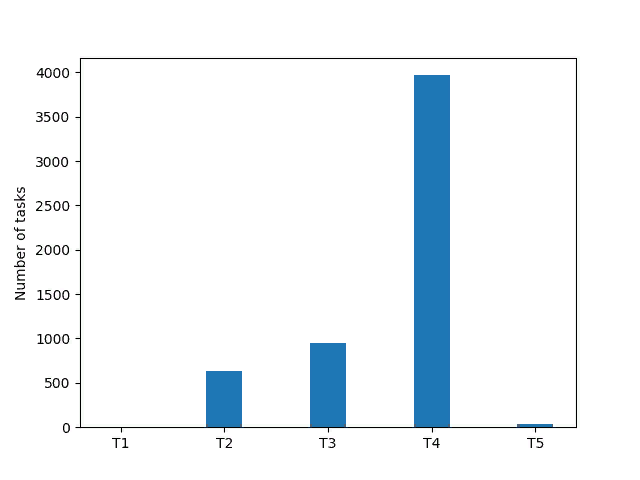

([<matplotlib.axis.XTick at 0xadf1d2f1d0>,
 <a list of 5 Text xticklabel objects>)

In [2]:
from time import time
import matplotlib.pyplot as plt
import numpy as np
import random
from test_functions import sinuses
from test_functions import quadratic_function as qf
from method_functions import halving_square, gradient_descent
import math
%matplotlib notebook

#Сompetion: Gradient Descent vs New method
#Sinuses
results = []
epsilon = [0.1**(3 + i) for i in range(7)]
num = 0
for i in np.linspace(1.1, 1.9, 5).tolist():
    for j in np.linspace(1.1, 1.9, 5).tolist():
        print((num * 4), '% is completed')
        a = [[0.1, 0.1], [0.1, 0.1, 0.1]]
        m, n = 1, 2
        while m != -1:
            f = sinuses(a, [i, j])
            for eps in epsilon:
                m1 = time()
                res_1 = gradient_descent(f.calculate_function, [0, 1, 0, 1], f.gradient, eps, 0.25, f.min)
                m2 = time()
                res_2 = halving_square(f, eps, [0, 1, 0, 1])
                m3 = time()
                results.append((eps, res_1[1], res_2[1], m2 - m1, m3 - m2))
            m, n = 1, 2
            while m != -1 and a[m][n] == 1:
                a[m][n] = 0.1
                n = n - 1
                if n < 0:
                    m = m - 1
                    if m > 0:
                        n = 2
                    else:
                        n = 1
            a[max(m, 0)][n] *= 10
        num += 1
print('100 % is completed')

p = 1.05

data = (len([i[0] for i in results
             if i[1] >= 0 and i[2] < 0]),
        len([i[0] for i in results
             if i[1] >= 0 and i[2] >= 0 and i[4] > p * i[3]]),
        len([i[0] for i in results
             if i[1] >= 0 and i[2] >= 0 and (1/p * i[3]) <= i[4] and i[4] <= (p * i[3])]),
        len([i[0] for i in results
             if i[1] >= 0 and i[2] >= 0 and i[4] < 1/p * i[3]]),
        len([i[0] for i in results
             if i[1] < 0 and i[2] >= 0]))
ind = np.arange(5)
width = 0.35
p1 = plt.bar(ind, data, width)
plt.ylabel('Number of tasks')
plt.xticks(ind, ('T1', 'T2', 'T3', 'T4', 'T5'))

### Quadratic functions
See [Description of tests functions properties](https://github.com/ASEDOS999/Optimization-Halving-The-Square/blob/master/Tests/Description.pdf) part 1.1.

10.0 %
20.0 %
30.0 %
40.0 %
50.0 %
60.0 %
70.0 %
80.0 %
90.0 %
100.0 %


<IPython.core.display.Javascript object>


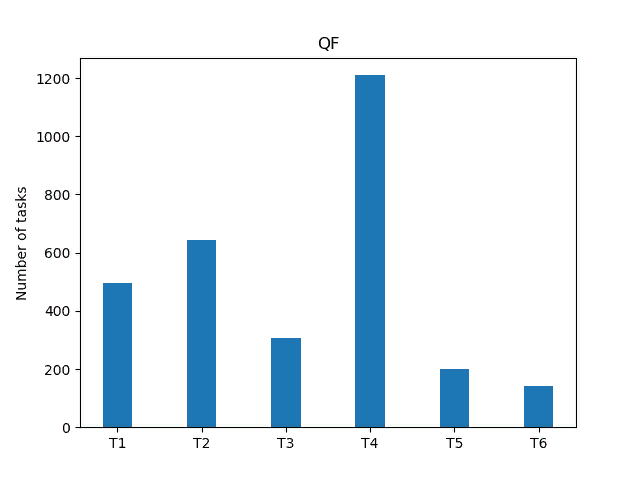

([<matplotlib.axis.XTick at 0xadf4849a58>,
 <a list of 6 Text xticklabel objects>)

In [3]:
from time import time
import matplotlib.pyplot as plt
import numpy as np
import random
from test_functions import sinuses
from test_functions import quadratic_function as qf
from method_functions import halving_square, gradient_descent
import math
%matplotlib notebook

#Quadratic functions
results = []
epsilon = [0.1**(i) for i in range(3)]
num = 0
N = 1000
n = 0
while len(results) < 3 * N:
        n += 1
        if n % 100 == 0:
            print(n / 10,'%')
        param = np.random.uniform(-10, 10, 6)
        param[2] =  abs(param[2])
        f = qf(param)
        size_1, size_2 = random.uniform(0.5, 1), random.uniform(0.5, 1)
        x_1, y_1 = f.solution[0], f.solution[1]
        Q = [x_1 - (1-size_1), x_1 + (1+size_1), y_1 - (1-size_2), y_1 + (1+size_2)]
        for eps in epsilon:
            m1 = time()
            res_1 = gradient_descent(f.calculate_function, Q, f.gradient, eps, 0.25, f.min)
            m2 = time()
            res_2 = halving_square(f, eps, Q)
            m3 = time()
            results.append((eps, res_1[1], res_2[1], m2 - m1, m3 - m2))

p = 1.05

data = (len([i[0] for i in results
             if i[1] >= 0 and i[2] < 0]),
        len([i[0] for i in results
             if i[1] >= 0 and i[2] >= 0 and i[4] > p * i[3]]),
        len([i[0] for i in results
             if i[1] >= 0 and i[2] >= 0 and (1/p * i[3]) <= i[4] and i[4] <= (p * i[3])]),
        len([i[0] for i in results
             if i[1] >= 0 and i[2] >= 0 and i[4] < 1/p * i[3]]),
        len([i[0] for i in results
             if i[1] < 0 and i[2] >= 0]),
        len([i[0] for i in results
             if i[1] < 0 and i[2] < 0]))
ind = np.arange(6)
width = 0.35
p1 = plt.bar(ind, data, width)
plt.title('QF')
plt.ylabel('Number of tasks')
plt.xticks(ind, ('T1', 'T2', 'T3', 'T4', 'T5', 'T6'))